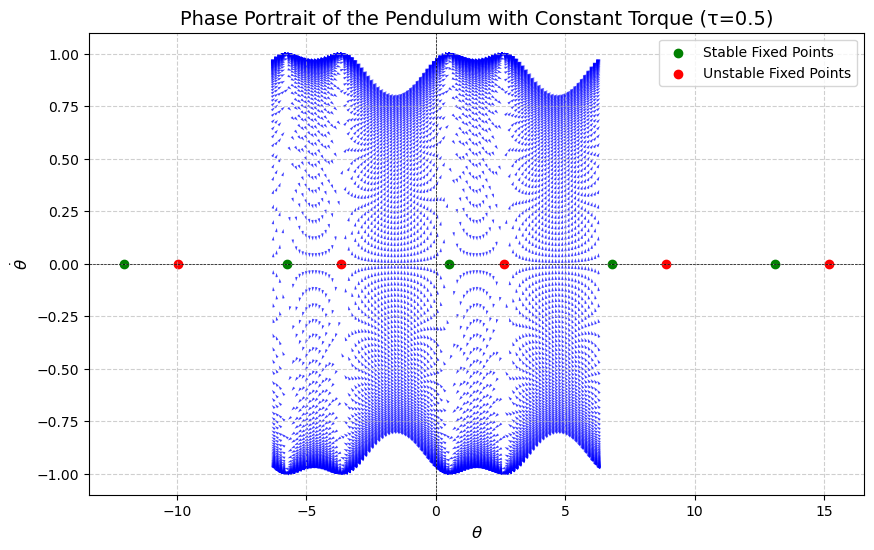

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def pendulum_with_torque(theta, omega, tau):
    dtheta = omega
    domega = tau - np.sin(theta)
    return dtheta, domega

# Create a grid for theta and omega
theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
omega = np.linspace(-2, 2, 100)
Theta, Omega = np.meshgrid(theta, omega)

# Torque parameter
tau = 0.5  # Adjust this to change the constant torque

# Compute the vector field
DTheta, DOmega = pendulum_with_torque(Theta, Omega, tau)

# Normalize the vectors for better visualization
magnitude = np.sqrt(DTheta**2 + DOmega**2)
DTheta /= magnitude
DOmega /= magnitude

# Plot the phase portrait
plt.figure(figsize=(10, 6))
plt.quiver(Theta, Omega, DTheta, DOmega, color='b', pivot='middle', alpha=0.75)
plt.title(f"Phase Portrait of the Pendulum with Constant Torque (τ={tau})", fontsize=14)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel(r"$\dot{\theta}$", fontsize=12)
plt.axhline(0, color='k', linewidth=0.5, linestyle='--')
plt.axvline(0, color='k', linewidth=0.5, linestyle='--')

# Mark fixed points
stable_points = [np.arcsin(tau)]
unstable_points = [np.pi - np.arcsin(tau)]

# Extend fixed points for periodicity (e.g., +/- 2π)
stable_points_periodic = [pt + 2 * n * np.pi for pt in stable_points for n in range(-2, 3)]
unstable_points_periodic = [pt + 2 * n * np.pi for pt in unstable_points for n in range(-2, 3)]

plt.scatter(stable_points_periodic, [0] * len(stable_points_periodic), color='g', label='Stable Fixed Points')
plt.scatter(unstable_points_periodic, [0] * len(unstable_points_periodic), color='r', label='Unstable Fixed Points')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


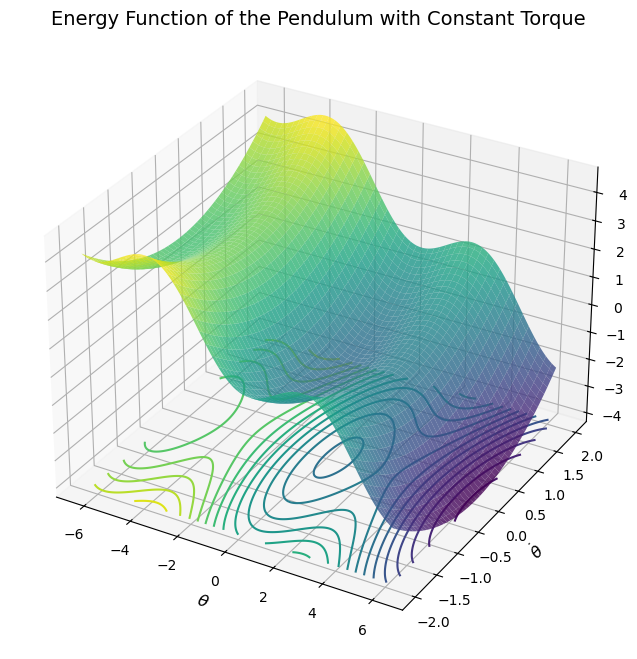

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Define the energy function
def energy_function(theta, omega, tau):
    return 0.5 * omega**2 - tau * theta - np.cos(theta)

# Create a finer grid for plotting the energy function
theta_fine = np.linspace(-2 * np.pi, 2 * np.pi, 200)
omega_fine = np.linspace(-2, 2, 200)
Theta_fine, Omega_fine = np.meshgrid(theta_fine, omega_fine)

# Compute the energy values
Energy = energy_function(Theta_fine, Omega_fine, tau)

# 3D Plot of the energy function
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta_fine, Omega_fine, Energy, cmap='viridis', alpha=0.8)

# Labels and title
ax.set_title("Energy Function of the Pendulum with Constant Torque", fontsize=14)
ax.set_xlabel(r"$\theta$", fontsize=12)
ax.set_ylabel(r"$\dot{\theta}$", fontsize=12)
ax.set_zlabel("Energy", fontsize=12)

# Overlay the phase portrait as a projection
ax.contour(Theta_fine, Omega_fine, Energy, levels=20, offset=np.min(Energy), cmap='viridis')

plt.show()
